## Imports and Data Preprocessing

Import data and do basics of removing extraneous data

In [1]:
# Initial imports
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.utils import np_utils

%matplotlib inline

In [2]:
# Import Verlander dataset 

verlander_df = pd.read_csv(Path("../resources/verlander_update.csv"))

display(verlander_df.head())

,pitch_type,game_date,player_name,batter,pitcher,events,description,zone,des,stand,...,on_1b,outs_when_up,inning,at_bat_number,pitch_number,pitch_name,bat_score,fld_score,if_fielding_alignment,of_fielding_alignment
0,SL,9/16/2022,"Verlander, Justin",669127,434378,strikeout,swinging_strike,9,Shea Langeliers strikes out swinging.,R,...,NaN,2,5,35,5,Slider,0,2,Infield shift,Standard
1,FF,9/16/2022,"Verlander, Justin",669127,434378,NaN,foul,3,Shea Langeliers strikes out swinging.,R,...,NaN,2,5,35,4,4-Seam Fastball,0,2,Infield shift,Standard
2,SL,9/16/2022,"Verlander, Justin",669127,434378,NaN,called_strike,13,Shea Langeliers strikes out swinging.,R,...,NaN,2,5,35,3,Slider,0,2,Infield shift,Standard
3,FF,9/16/2022,"Verlander, Justin",669127,434378,NaN,foul,1,Shea Langeliers strikes out swinging.,R,...,NaN,2,5,35,2,4-Seam Fastball,0,2,Infield shift,Standard
4,SL,9/16/2022,"Verlander, Justin",669127,434378,NaN,ball,8,Shea Langeliers strikes out swinging.,R,...,NaN,2,5,35,1,Slider,0,2,Infield shift,Standard


In [3]:
# Clean dataset 

verlander_df = verlander_df.drop(columns=['des',
'at_bat_number', 
'inning', 
'zone', 
'player_name', 
'batter', 
'pitcher', 
'events',
'bb_type',
'hit_location',
'home_team',
'away_team'])

display(verlander_df.head())

,pitch_type,game_date,description,stand,p_throws,type,balls,strikes,on_3b,on_2b,on_1b,outs_when_up,pitch_number,pitch_name,bat_score,fld_score,if_fielding_alignment,of_fielding_alignment
0,SL,9/16/2022,swinging_strike,R,R,S,1,2,NaN,NaN,NaN,2,5,Slider,0,2,Infield shift,Standard
1,FF,9/16/2022,foul,R,R,S,1,2,NaN,NaN,NaN,2,4,4-Seam Fastball,0,2,Infield shift,Standard
2,SL,9/16/2022,called_strike,R,R,S,1,1,NaN,NaN,NaN,2,3,Slider,0,2,Infield shift,Standard
3,FF,9/16/2022,foul,R,R,S,1,0,NaN,NaN,NaN,2,2,4-Seam Fastball,0,2,Infield shift,Standard
4,SL,9/16/2022,ball,R,R,B,0,0,NaN,NaN,NaN,2,1,Slider,0,2,Infield shift,Standard


In [4]:
# Encode 1st, 2nd and 3rd bases with 1s and 0s

# Fill NaN to 0 
verlander_df['on_3b'] = verlander_df['on_3b'].fillna(0)
verlander_df['on_2b'] = verlander_df['on_2b'].fillna(0)
verlander_df['on_1b'] = verlander_df['on_1b'].fillna(0)

# Change batter IDs to 1 
verlander_df['on_3b'][verlander_df['on_3b'] > 0.0] = 1.0
verlander_df['on_2b'][verlander_df['on_2b'] > 0.0] = 1.0
verlander_df['on_1b'][verlander_df['on_1b'] > 0.0] = 1.0

display(verlander_df.head())

/var/folders/zx/3xfmqcd54f3fdz2hfpnll0_80000gn/T/ipykernel_6095/1558983953.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verlander_df['on_3b'][verlander_df['on_3b'] > 0.0] = 1.0
/var/folders/zx/3xfmqcd54f3fdz2hfpnll0_80000gn/T/ipykernel_6095/1558983953.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verlander_df['on_2b'][verlander_df['on_2b'] > 0.0] = 1.0
/var/folders/zx/3xfmqcd54f3fdz2hfpnll0_80000gn/T/ipykernel_6095/1558983953.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

,pitch_type,game_date,description,stand,p_throws,type,balls,strikes,on_3b,on_2b,on_1b,outs_when_up,pitch_number,pitch_name,bat_score,fld_score,if_fielding_alignment,of_fielding_alignment
0,SL,9/16/2022,swinging_strike,R,R,S,1,2,0.0,0.0,0.0,2,5,Slider,0,2,Infield shift,Standard
1,FF,9/16/2022,foul,R,R,S,1,2,0.0,0.0,0.0,2,4,4-Seam Fastball,0,2,Infield shift,Standard
2,SL,9/16/2022,called_strike,R,R,S,1,1,0.0,0.0,0.0,2,3,Slider,0,2,Infield shift,Standard
3,FF,9/16/2022,foul,R,R,S,1,0,0.0,0.0,0.0,2,2,4-Seam Fastball,0,2,Infield shift,Standard
4,SL,9/16/2022,ball,R,R,B,0,0,0.0,0.0,0.0,2,1,Slider,0,2,Infield shift,Standard


In [5]:
# Fill NaN in description column

verlander_df['description'] = verlander_df['description'].fillna('nothing')

In [6]:
# Shift pitches so that model does not know the upcoming pitch 

lagged_columns = verlander_df[['pitch_name', 'type']].shift(-1).dropna()

lagged_verlander_df = verlander_df.drop(columns=['pitch_name', 'type'])

lagged_verlander_df = pd.concat([verlander_df, lagged_columns], join='inner', axis=1)

display(lagged_verlander_df)

,pitch_type,game_date,description,stand,p_throws,type,balls,strikes,on_3b,on_2b,on_1b,outs_when_up,pitch_number,pitch_name,bat_score,fld_score,if_fielding_alignment,of_fielding_alignment,pitch_name,type
0,SL,9/16/2022,swinging_strike,R,R,S,1,2,0.0,0.0,0.0,2,5,Slider,0,2,Infield shift,Standard,4-Seam Fastball,S
1,FF,9/16/2022,foul,R,R,S,1,2,0.0,0.0,0.0,2,4,4-Seam Fastball,0,2,Infield shift,Standard,Slider,S
2,SL,9/16/2022,called_strike,R,R,S,1,1,0.0,0.0,0.0,2,3,Slider,0,2,Infield shift,Standard,4-Seam Fastball,S
3,FF,9/16/2022,foul,R,R,S,1,0,0.0,0.0,0.0,2,2,4-Seam Fastball,0,2,Infield shift,Standard,Slider,B
4,SL,9/16/2022,ball,R,R,B,0,0,0.0,0.0,0.0,2,1,Slider,0,2,Infield shift,Standard,Slider,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2330,FF,4/9/2022,ball,R,R,B,0,0,0.0,0.0,0.0,1,1,4-Seam Fastball,0,0,Infield shift,Standard,4-Seam Fastball,S
2331,FF,4/9/2022,swinging_strike,L,R,S,2,2,0.0,0.0,0.0,0,5,4-Seam Fastball,0,0,Infield shift,Standard,4-Seam Fastball,S
2332,FF,4/9/2022,foul_tip,L,R,S,2,1,0.0,0.0,0.0,0,4,4-Seam Fastball,0,0,Infield shift,Standard,4-Seam Fastball,B
2333,FF,4/9/2022,ball,L,R,B,1,1,0.0,0.0,0.0,0,3,4-Seam Fastball,0,0,Infield shift,Standard,4-Seam Fastball,S


## Data Processing 

Prepare data to be fed into model

In [7]:
# Split into X and y 

X = lagged_verlander_df.drop(columns='pitch_type')
y= lagged_verlander_df['pitch_type']

display(y.value_counts)

<bound method IndexOpsMixin.value_counts of 0       SL
1       FF
2       SL
3       FF
4       SL
        ..
2330    FF
2331    FF
2332    FF
2333    FF
2334    FF
Name: pitch_type, Length: 2335, dtype: object>

In [8]:
# Use get_dummies to encode categorical variables 

X = pd.get_dummies(X)

encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_y)

display(X.head())
display(dummy_y)


# SL = index 3
# CH = index 0
# FF = index 2
# CU = index 1

,balls,strikes,on_3b,on_2b,on_1b,outs_when_up,pitch_number,bat_score,fld_score,game_date_4/16/2022,...,if_fielding_alignment_Strategic,of_fielding_alignment_Standard,of_fielding_alignment_Strategic,pitch_name_4-Seam Fastball,pitch_name_Changeup,pitch_name_Curveball,pitch_name_Slider,type_B,type_S,type_X
0,1,2,0.0,0.0,0.0,2,5,0,2,0,...,0,1,0,1,0,0,0,0,1,0
1,1,2,0.0,0.0,0.0,2,4,0,2,0,...,0,1,0,0,0,0,1,0,1,0
2,1,1,0.0,0.0,0.0,2,3,0,2,0,...,0,1,0,1,0,0,0,0,1,0
3,1,0,0.0,0.0,0.0,2,2,0,2,0,...,0,1,0,0,0,0,1,1,0,0
4,0,0,0.0,0.0,0.0,2,1,0,2,0,...,0,1,0,0,0,0,1,0,0,1


array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, random_state=1)

## Deep Learning/Neural Network Architecture

Using the method from the module, the following basis is used to design the first iteration of the neural network: 

*the mean of the number of input features and the number of neurons in the output layer ((number of input features + number of neurons in output layer) / 2). Use a number close to this mean for the number of neurons in the first hidden layer. Repeat this pattern for subsequent hidden layers ((number of neurons in the prior hidden layer + number of neurons in output layer) / 2). Softmax is the activation for the output layer that is used for multi-class classification. Categorial cross entropy and predictive model accuracy are respectively the loss functions and metrics used for multi-class classification*

In [10]:
# Initialize the Deep Learning Neural Network model

nn_v0 = Sequential()

2022-09-27 20:07:03.776086: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
# Design the network architecture 

# Define the model - deep neural net
number_input_features = len(X.columns)
number_output = 4

# Define hidden layers
i = 0
hidden_nodes_layer=(number_input_features+number_output)/2
while hidden_nodes_layer/2 > 4:
    if i == 0:
        nn_v0.add(Dense(units=round(hidden_nodes_layer), input_dim=number_input_features, activation='relu'))
        i+=1
    else:
        hidden_nodes_layer = hidden_nodes_layer/2
        nn_v0.add(Dense(units=round(hidden_nodes_layer), activation='relu'))
        i+=1

# Define output layer
nn_v0.add(Dense(units=number_output, activation='softmax'))

# Compile the model
nn_v0.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

display(nn_v0.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 35)                2345      
                                                                 
 dense_1 (Dense)             (None, 18)                648       
                                                                 
 dense_2 (Dense)             (None, 9)                 171       
                                                                 
 dense_3 (Dense)             (None, 4)                 40        
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
Total params: 3,224
Trainable params: 3,224
Non-trainable params: 0
_________________________________________________________________


None

In [12]:
# Fit the data to the model

model_v0 = nn_v0.fit(X_train, y_train, epochs=100)

Epoch 1/100
55/55 [==============================] - 1s 976us/step - loss: 1.2997 - accuracy: 0.3861
Epoch 2/100
55/55 [==============================] - 0s 988us/step - loss: 1.1067 - accuracy: 0.5151
Epoch 3/100
55/55 [==============================] - 0s 1ms/step - loss: 0.7756 - accuracy: 0.5997
Epoch 4/100
55/55 [==============================] - 0s 2ms/step - loss: 0.5988 - accuracy: 0.7653
Epoch 5/100
55/55 [==============================] - 0s 1ms/step - loss: 0.5246 - accuracy: 0.8789
Epoch 6/100
55/55 [==============================] - 0s 1ms/step - loss: 0.4447 - accuracy: 0.9714
Epoch 7/100
55/55 [==============================] - 0s 901us/step - loss: 0.3764 - accuracy: 0.9720
Epoch 8/100
55/55 [==============================] - 0s 907us/step - loss: 0.3361 - accuracy: 0.9732
Epoch 9/100
55/55 [==============================] - 0s 968us/step - loss: 0.3111 - accuracy: 0.9732
Epoch 10/100
55/55 [==============================] - 0s 1ms/step - loss: 0.2942 - accuracy: 0.9732

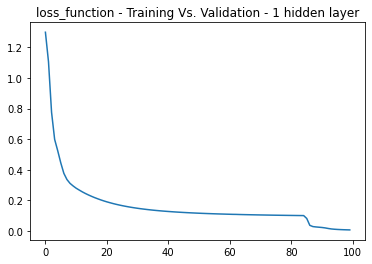

In [13]:
# Plot the loss over epochs

plt.plot(model_v0.history["loss"])
plt.title("loss_function - Training Vs. Validation - 1 hidden layer")
#plt.legend(["train", "test"])
plt.show()

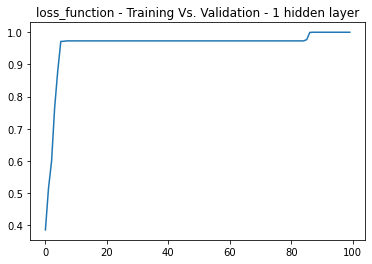

In [14]:
# Plot the accuracy over epochs

plt.plot(model_v0.history["accuracy"])
plt.title("loss_function - Training Vs. Validation - 1 hidden layer")
#plt.legend(["train", "test"])
plt.show()

In [15]:
model_loss, model_accuracy = nn_v0.evaluate(
    X_test, y_test, verbose=2
)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

19/19 - 0s - loss: 0.0071 - accuracy: 1.0000 - 172ms/epoch - 9ms/step
Loss: 0.007107330486178398, Accuracy: 1.0


In [16]:

y_pred = nn_v0.predict(X_test)
pred_final = np.argmax(y_pred, axis=1)

y_test_reverted = []
for lists in y_test:
    if lists[0] == 1:
        y_test_reverted.append('CH')
    elif lists[1] == 1:
        y_test_reverted.append('CU')
    elif lists[2] == 1:
        y_test_reverted.append('FF')
    else:
        y_test_reverted.append('SL')

y_pred_converted = []
for numbers in pred_final:
    if numbers == 0:
        y_pred_converted.append('CH')
    elif numbers == 1:
        y_pred_converted.append('CU')
    elif numbers == 2:
        y_pred_converted.append('FF')
    else: 
        y_pred_converted.append('SL')

# display(y_test)
# display(pred_final)
final_results = pd.DataFrame({
    'Predictions': y_pred_converted,
    'Actual':  y_test_reverted})

display(final_results.head())
print(classification_report(final_results['Actual'], final_results['Predictions']))


19/19 [==============================] - 0s 1ms/step


,Predictions,Actual
0,FF,FF
1,FF,FF
2,FF,FF
3,FF,FF
4,CU,CU


              precision    recall  f1-score   support

          CH       1.00      1.00      1.00         9
          CU       1.00      1.00      1.00       113
          FF       1.00      1.00      1.00       277
          SL       1.00      1.00      1.00       185

    accuracy                           1.00       584
   macro avg       1.00      1.00      1.00       584
weighted avg       1.00      1.00      1.00       584



## Optimize the Model

### Optimized Model 1
Optimize the model by increasing the number of epochs 

In [17]:
#Define the new, optimized model

nn_v1 = Sequential()

In [18]:
# Design the network architecture 

# Define the model - deep neural net
number_input_features = len(X.columns)
number_output = 4

# Define hidden layers
i = 0
hidden_nodes_layer=(number_input_features+number_output)/2
while hidden_nodes_layer/2 > 4: 
    if i == 0:
        nn_v1.add(Dense(units=round(hidden_nodes_layer), input_dim=number_input_features, activation='relu'))
        i+=1
    else:
        hidden_nodes_layer = hidden_nodes_layer/2
        nn_v1.add(Dense(units=round(hidden_nodes_layer), activation='relu'))
        i+=1

# Define output layer
nn_v1.add(Dense(units=number_output, activation='softmax'))

# Compile the model
nn_v1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

display(nn_v1.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 35)                2345      
                                                                 
 dense_6 (Dense)             (None, 18)                648       
                                                                 
 dense_7 (Dense)             (None, 9)                 171       
                                                                 
 dense_8 (Dense)             (None, 4)                 40        
                                                                 
 dense_9 (Dense)             (None, 4)                 20        
                                                                 
Total params: 3,224
Trainable params: 3,224
Non-trainable params: 0
_________________________________________________________________


None

In [19]:
# Fit the data to the model

model_v1 = nn_v1.fit(X_train, y_train, epochs=500)

Epoch 1/500
55/55 [==============================] - 0s 1ms/step - loss: 1.2994 - accuracy: 0.5066
Epoch 2/500
55/55 [==============================] - 0s 1ms/step - loss: 0.9961 - accuracy: 0.5220
Epoch 3/500
55/55 [==============================] - 0s 1ms/step - loss: 0.6989 - accuracy: 0.7196
Epoch 4/500
55/55 [==============================] - 0s 1ms/step - loss: 0.6033 - accuracy: 0.8778
Epoch 5/500
55/55 [==============================] - 0s 1ms/step - loss: 0.5024 - accuracy: 0.9634
Epoch 6/500
55/55 [==============================] - 0s 1ms/step - loss: 0.4032 - accuracy: 0.9709
Epoch 7/500
55/55 [==============================] - 0s 1ms/step - loss: 0.2832 - accuracy: 0.9732
Epoch 8/500
55/55 [==============================] - 0s 1ms/step - loss: 0.1004 - accuracy: 0.9732
Epoch 9/500
55/55 [==============================] - 0s 1ms/step - loss: 0.0648 - accuracy: 0.9732
Epoch 10/500
55/55 [==============================] - 0s 1ms/step - loss: 0.0529 - accuracy: 0.9732
Epoch 11/

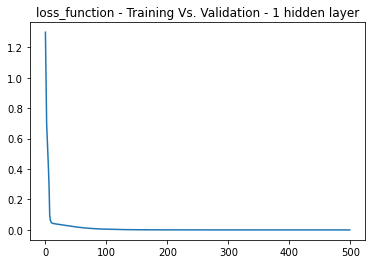

In [20]:
# Plot the loss over epochs

plt.plot(model_v1.history["loss"])
plt.title("loss_function - Training Vs. Validation - 1 hidden layer")
plt.show()

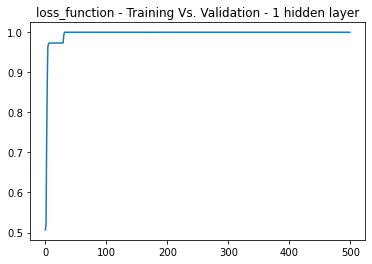

In [21]:
# Plot the accuracy over epochs

plt.plot(model_v1.history["accuracy"])
plt.title("loss_function - Training Vs. Validation - 1 hidden layer")
#plt.legend(["train", "test"])
plt.show()

In [22]:
model_loss, model_accuracy = nn_v1.evaluate(
    X_test, y_test, verbose=2
)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

19/19 - 0s - loss: 1.3289e-07 - accuracy: 1.0000 - 149ms/epoch - 8ms/step
Loss: 1.3288513400766533e-07, Accuracy: 1.0


In [23]:

y_pred = nn_v1.predict(X_test)
pred_final = np.argmax(y_pred, axis=1)

y_test_reverted = []
for lists in y_test:
    if lists[0] == 1:
        y_test_reverted.append('CH')
    elif lists[1] == 1:
        y_test_reverted.append('CU')
    elif lists[2] == 1:
        y_test_reverted.append('FF')
    else:
        y_test_reverted.append('SL')

y_pred_converted = []
for numbers in pred_final:
    if numbers == 0:
        y_pred_converted.append('CH')
    elif numbers == 1:
        y_pred_converted.append('CU')
    elif numbers == 2:
        y_pred_converted.append('FF')
    else: 
        y_pred_converted.append('SL')

# display(y_test)
# display(pred_final)
final_results_v1 = pd.DataFrame({
    'Predictions': y_pred_converted,
    'Actual':  y_test_reverted})

display(final_results_v1.head())
print(classification_report(final_results['Actual'], final_results['Predictions']))

19/19 [==============================] - 0s 671us/step


,Predictions,Actual
0,FF,FF
1,FF,FF
2,FF,FF
3,FF,FF
4,CU,CU


              precision    recall  f1-score   support

          CH       1.00      1.00      1.00         9
          CU       1.00      1.00      1.00       113
          FF       1.00      1.00      1.00       277
          SL       1.00      1.00      1.00       185

    accuracy                           1.00       584
   macro avg       1.00      1.00      1.00       584
weighted avg       1.00      1.00      1.00       584



### Optimized Model 2

From Keras, use the stochastic gradient descent (SGD) optimizer that is an iterative method for optimizing an objective function with suitable smoothness properties

In [24]:
# Define the model

nn_v2 = Sequential()

In [25]:
# Design the network architecture 

import tensorflow as tf

tf.keras.optimizers.Adadelta(
    learning_rate=100,
    rho=0.95,
    epsilon=1e-07,
    name='Adadelta'
)
#from keras.optimizers import Adadelta
# Define the model - deep neural net

total_neurons = len(X.columns)*(2/3)
number_input_features = len(X.columns)
number_output = 4

# Define hidden layers
i = 0
hidden_nodes_layer=(number_input_features+number_output)/2
while hidden_nodes_layer/2 > 4: 
    if i == 0:
        nn_v2.add(Dense(units=round(hidden_nodes_layer), input_dim=number_input_features, activation='relu'))
        i+=1
    else:
        hidden_nodes_layer = hidden_nodes_layer/2
        nn_v2.add(Dense(units=round(hidden_nodes_layer), activation='relu'))
        i+=1

# Define output layer
nn_v2.add(Dense(units=number_output, activation='softmax'))

# Compile the model
nn_v2.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

display(nn_v2.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 35)                2345      
                                                                 
 dense_11 (Dense)            (None, 18)                648       
                                                                 
 dense_12 (Dense)            (None, 9)                 171       
                                                                 
 dense_13 (Dense)            (None, 4)                 40        
                                                                 
 dense_14 (Dense)            (None, 4)                 20        
                                                                 
Total params: 3,224
Trainable params: 3,224
Non-trainable params: 0
_________________________________________________________________


None

In [26]:
# Fit the data to the model

model_v2 = nn_v2.fit(X_train, y_train, epochs=100)

Epoch 1/100
55/55 [==============================] - 0s 818us/step - loss: 1.4251 - accuracy: 0.1822
Epoch 2/100
55/55 [==============================] - 0s 855us/step - loss: 1.4245 - accuracy: 0.1828
Epoch 3/100
55/55 [==============================] - 0s 811us/step - loss: 1.4239 - accuracy: 0.1828
Epoch 4/100
55/55 [==============================] - 0s 805us/step - loss: 1.4233 - accuracy: 0.1822
Epoch 5/100
55/55 [==============================] - 0s 958us/step - loss: 1.4227 - accuracy: 0.1822
Epoch 6/100
55/55 [==============================] - 0s 2ms/step - loss: 1.4221 - accuracy: 0.1810
Epoch 7/100
55/55 [==============================] - 0s 1ms/step - loss: 1.4215 - accuracy: 0.1810
Epoch 8/100
55/55 [==============================] - 0s 1ms/step - loss: 1.4209 - accuracy: 0.1810
Epoch 9/100
55/55 [==============================] - 0s 1ms/step - loss: 1.4204 - accuracy: 0.1810
Epoch 10/100
55/55 [==============================] - 0s 815us/step - loss: 1.4198 - accuracy: 0.18

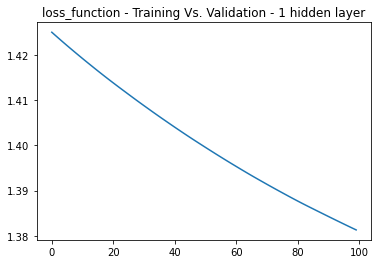

In [27]:
# Plot the loss over epochs

plt.plot(model_v2.history["loss"])
plt.title("loss_function - Training Vs. Validation - 1 hidden layer")
plt.show()

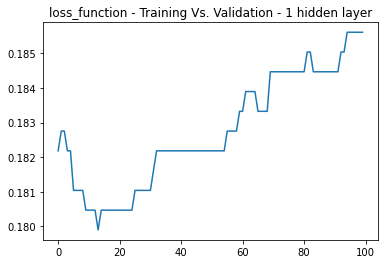

In [28]:
# Plot the accuracy over epochs

plt.plot(model_v2.history["accuracy"])
plt.title("loss_function - Training Vs. Validation - 1 hidden layer")
#plt.legend(["train", "test"])
plt.show()

In [29]:
model_loss, model_accuracy = nn_v2.evaluate(
    X_test, y_test, verbose=2
)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

19/19 - 0s - loss: 1.3743 - accuracy: 0.1969 - 118ms/epoch - 6ms/step
Loss: 1.3743051290512085, Accuracy: 0.1969178020954132


In [30]:

y_pred = nn_v2.predict(X_test)
pred_final = np.argmax(y_pred, axis=1)

y_test_reverted = []
for lists in y_test:
    if lists[0] == 1:
        y_test_reverted.append('CH')
    elif lists[1] == 1:
        y_test_reverted.append('CU')
    elif lists[2] == 1:
        y_test_reverted.append('FF')
    else:
        y_test_reverted.append('SL')

y_pred_converted = []
for numbers in pred_final:
    if numbers == 0:
        y_pred_converted.append('CH')
    elif numbers == 1:
        y_pred_converted.append('CU')
    elif numbers == 2:
        y_pred_converted.append('FF')
    else: 
        y_pred_converted.append('SL')

# display(y_test)
# display(pred_final)
final_results_v2 = pd.DataFrame({
    'Predictions': y_pred_converted,
    'Actual':  y_test_reverted})

display(final_results_v2.head())
print(classification_report(final_results['Actual'], final_results['Predictions']))

19/19 [==============================] - 0s 696us/step


,Predictions,Actual
0,CU,FF
1,CU,FF
2,CU,FF
3,CU,FF
4,CU,CU


              precision    recall  f1-score   support

          CH       1.00      1.00      1.00         9
          CU       1.00      1.00      1.00       113
          FF       1.00      1.00      1.00       277
          SL       1.00      1.00      1.00       185

    accuracy                           1.00       584
   macro avg       1.00      1.00      1.00       584
weighted avg       1.00      1.00      1.00       584



### Optimized Model 3

From Keras, use the stochastic gradient descent (SGD) optimizer that is an iterative method for optimizing an objective function with suitable smoothness properties

In [31]:
# Define the model

nn_v3 = Sequential()

In [32]:
# Design the network architecture 


from keras.optimizers import SGD
# Define the model - deep neural net

total_neurons = len(X.columns)*(2/3)
number_input_features = len(X.columns)
number_output = 4

# Define hidden layers
i = 0
hidden_nodes_layer=(number_input_features+number_output)/2
while hidden_nodes_layer/2 > 4: 
    if i == 0:
        nn_v3.add(Dense(units=round(hidden_nodes_layer), input_dim=number_input_features, activation='relu'))
        i+=1
    else:
        hidden_nodes_layer = hidden_nodes_layer/2
        nn_v3.add(Dense(units=round(hidden_nodes_layer), activation='relu'))
        i+=1

# Define output layer
nn_v3.add(Dense(units=number_output, activation='softmax'))

# Compile the model
nn_v3.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

display(nn_v3.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 35)                2345      
                                                                 
 dense_16 (Dense)            (None, 18)                648       
                                                                 
 dense_17 (Dense)            (None, 9)                 171       
                                                                 
 dense_18 (Dense)            (None, 4)                 40        
                                                                 
 dense_19 (Dense)            (None, 4)                 20        
                                                                 
Total params: 3,224
Trainable params: 3,224
Non-trainable params: 0
_________________________________________________________________


None

In [33]:
# Fit the data to the model

model_v3 = nn_v3.fit(X_train, y_train, epochs=100)

Epoch 1/100
55/55 [==============================] - 0s 816us/step - loss: 1.3187 - accuracy: 0.4323
Epoch 2/100
55/55 [==============================] - 0s 759us/step - loss: 1.1692 - accuracy: 0.5146
Epoch 3/100
55/55 [==============================] - 0s 795us/step - loss: 1.0444 - accuracy: 0.5557
Epoch 4/100
55/55 [==============================] - 0s 797us/step - loss: 0.8581 - accuracy: 0.6533
Epoch 5/100
55/55 [==============================] - 0s 798us/step - loss: 0.6515 - accuracy: 0.7504
Epoch 6/100
55/55 [==============================] - 0s 795us/step - loss: 0.5191 - accuracy: 0.7836
Epoch 7/100
55/55 [==============================] - 0s 836us/step - loss: 0.4495 - accuracy: 0.7893
Epoch 8/100
55/55 [==============================] - 0s 914us/step - loss: 0.4076 - accuracy: 0.7933
Epoch 9/100
55/55 [==============================] - 0s 831us/step - loss: 0.3703 - accuracy: 0.8241
Epoch 10/100
55/55 [==============================] - 0s 794us/step - loss: 0.3342 - accura

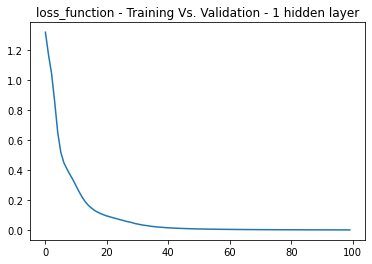

In [34]:
# Plot the loss over epochs

plt.plot(model_v3.history["loss"])
plt.title("loss_function - Training Vs. Validation - 1 hidden layer")
plt.show()

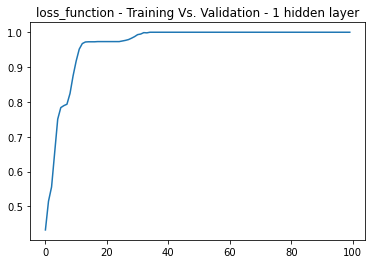

In [35]:
# Plot the accuracy over epochs

plt.plot(model_v3.history["accuracy"])
plt.title("loss_function - Training Vs. Validation - 1 hidden layer")
#plt.legend(["train", "test"])
plt.show()

In [36]:
model_loss, model_accuracy = nn_v3.evaluate(
    X_test, y_test, verbose=2
)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

19/19 - 0s - loss: 0.0021 - accuracy: 1.0000 - 163ms/epoch - 9ms/step
Loss: 0.002149747684597969, Accuracy: 1.0


In [38]:

y_pred = nn_v3.predict(X_test)
pred_final = np.argmax(y_pred, axis=1)

y_test_reverted = []
for lists in y_test:
    if lists[0] == 1:
        y_test_reverted.append('CH')
    elif lists[1] == 1:
        y_test_reverted.append('CU')
    elif lists[2] == 1:
        y_test_reverted.append('FF')
    else:
        y_test_reverted.append('SL')

y_pred_converted = []
for numbers in pred_final:
    if numbers == 0:
        y_pred_converted.append('CH')
    elif numbers == 1:
        y_pred_converted.append('CU')
    elif numbers == 2:
        y_pred_converted.append('FF')
    else: 
        y_pred_converted.append('SL')

# display(y_test)
# display(pred_final)
final_results_v3 = pd.DataFrame({
    'Predictions': y_pred_converted,
    'Actual':  y_test_reverted})

display(final_results_v3[50:75])
print(classification_report(final_results['Actual'], final_results['Predictions']))

19/19 [==============================] - 0s 3ms/step


,Predictions,Actual
50,FF,FF
51,FF,FF
52,FF,FF
53,SL,SL
54,FF,FF
55,SL,SL
56,CU,CU
57,FF,FF
58,FF,FF
59,CU,CU


              precision    recall  f1-score   support

          CH       1.00      1.00      1.00         9
          CU       1.00      1.00      1.00       113
          FF       1.00      1.00      1.00       277
          SL       1.00      1.00      1.00       185

    accuracy                           1.00       584
   macro avg       1.00      1.00      1.00       584
weighted avg       1.00      1.00      1.00       584

